In [1]:
# Importing the dependency libraries
import numpy as np
import matplotlib.pyplot as plt
import csv


In [2]:
# Instantiate np data
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')


In [5]:
class Linear_Regression:
    def __init__(self, degree: int) -> None:
        self.degree = degree
        self.weights = np.array([0.0 for _ in range(degree + 1)])

    def setTrainData(self, x_data, y_data) -> None:
        self.x_data = x_data
        self.y_data = y_data
        if len(x_data) != len(y_data):
            raise ValueError(f"x_data and y_data must have the same length\ncurrent lengths: x_data = {len(x_data)}, y_data = {len(y_data)}")
        self.training_examples = len(x_data)

    def plotData(self) -> None:
        plt.scatter(self.x_data, self.y_data)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('train')
        plt.show()

    def hypothesis(self, x) -> float:
        hypothesis = 0
        for i in range(self.degree + 1):
            hypothesis += self.weights[i] * x ** i
        return hypothesis

    def gradient_descent(self, learning_rate: float, iterations: int) -> None:
        for _ in range(iterations):
            gradients = np.array([0.0 for _ in range(self.degree + 1)])
            for i in range(self.training_examples):
                x = self.x_data[i]
                y = self.y_data[i]
                
                y_pred = self.hypothesis(x)
                error = y_pred - y
                
                for i, w in enumerate(gradients):
                    gradients[i] += error * x ** i
                
            for i in range(self.degree + 1):
                self.weights[i] -= (learning_rate / self.training_examples) * gradients[i]

    def test_model(self) -> None:
        total_error = 0
        test_examples = len(self.x_data)
        
        x_predictions = []
        y_predictions = []
        
        for i in range(test_examples):
            y_pred = self.hypothesis(self.x_data[i])
            y_true = self.y_data[i]
            
            x_predictions.append(self.x_data[i])
            y_predictions.append(y_pred)
            
            total_error += (y_true - y_pred) ** 2  # Squared error

        mse = total_error / test_examples  # Mean squared error
        normalized_mse = mse / (np.mean(self.y_data) ** 2)  # Normalized mean squared error
        print(f"Normalized Mean Squared Error: {normalized_mse:.4f}")
        
        plt.scatter(self.x_data, self.y_data)
        plt.title('Train Data')
        plt.show()
        
        plt.scatter(x_predictions, y_predictions)
        plt.title('Predictions')
        plt.show()
        

Normalized Mean Squared Error: 0.0391


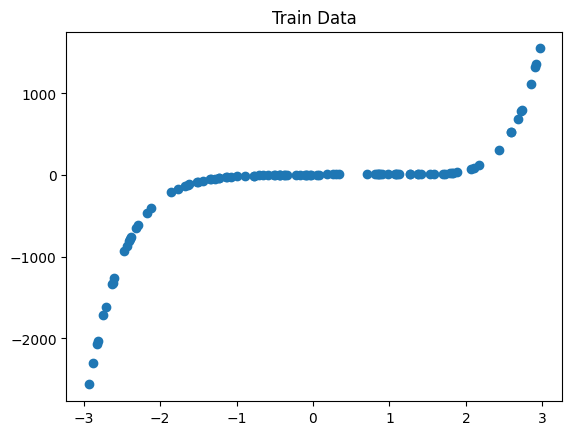

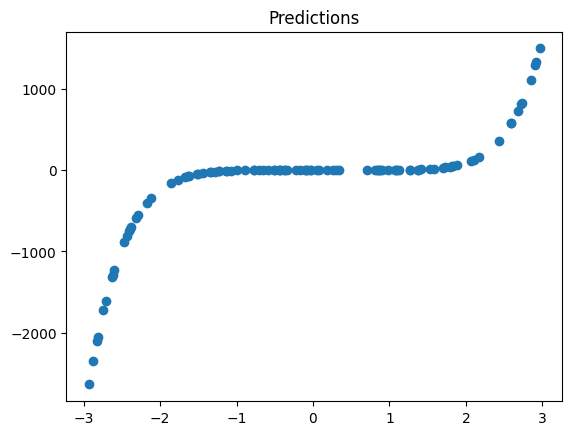

In [6]:
# The plotted image above looks very similar to an x^3 function.
# Therefore I will modify my linear regression equation in the Linear Regression Class to be Polynomial

question_one = Linear_Regression(degree=7)
question_one.setTrainData(x_train, y_train)


question_one.gradient_descent(learning_rate=0.000001, iterations=10000)

question_one.test_model()

# question_one = Exponential_Regression(degree=5)
# question_one.setTrainData(x_test, y_test)   

# question_one.gradient_descent(learning_rate=0.00001, iterations=10000)
# question_one.test_model()

In [ ]:
a